In [1]:
!pip install qiskit==0.46.0
!pip install qiskit-aer

In [3]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,Aer,execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector,plot_histogram,array_to_latex

In [4]:
!pip install pylatexenc
!pip install qiskit-ibmq-provider

C:\Users\LENOVO\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


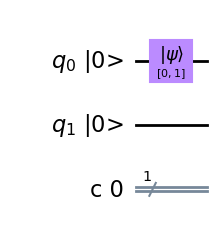

In [5]:
circuit  = QuantumCircuit(2,1)
initial_state = [0,1]
circuit.initialize(initial_state,0)
circuit.draw(output='mpl',initial_state=True)

In [6]:
circuit.measure(0,0)

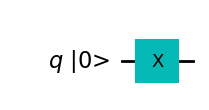

In [7]:
# x gate

circuit = QuantumCircuit(1)
circuit.x(0)
circuit.draw(output='mpl',initial_state=True)

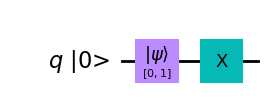

In [8]:
# |1> to |0>

circuit = QuantumCircuit(1)
initial_state = [0,1]
circuit.initialize(initial_state,0)
circuit.x(0)
circuit.draw(output='mpl',initial_state=True)

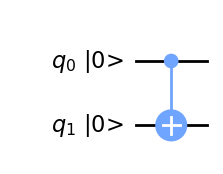

In [10]:
# cx

circuit = QuantumCircuit(2)
circuit.cx(0,1)
circuit.draw(output='mpl',initial_state=True)

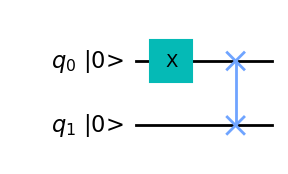

In [11]:
# swap gate

circuit = QuantumCircuit(2)
circuit.x(0)
circuit.swap(0,1)
circuit.draw(output='mpl',initial_state=True)

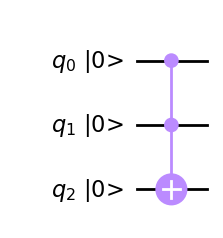

In [12]:
# toffolli gate

circuit = QuantumCircuit(3)
circuit.ccx(0,1,2)
circuit.draw(output='mpl',initial_state=True)

In [13]:
from qiskit import transpile,assemble

In [14]:
# state-vector
circuit = QuantumCircuit(1)
circuit.h(0)
simulator = Aer.get_backend('qasm_simulator')
circuit.save_statevector()
circuit = transpile(circuit,simulator)
result = simulator.run(circuit).result()
statevector = result.get_statevector(circuit)
print(statevector)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\1254379617.py:4: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')


Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [16]:
# 2nd way
ckt = QuantumCircuit(1)
ckt.h(0)
st = Statevector.from_instruction(ckt)
print(st)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [17]:
array_to_latex(st)

<IPython.core.display.Latex object>

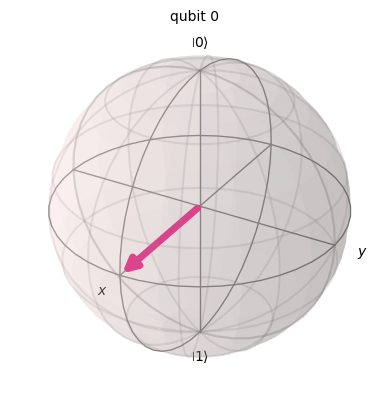

In [18]:
plot_bloch_multivector(st)

In [21]:
circuit = QuantumCircuit(1)
circuit.h(0)
simulator = Aer.get_backend('aer_simulator')
circuit.save_unitary()
circuit = transpile(circuit,simulator)
result = simulator.run(circuit).result()
unitary = result.get_unitary(circuit)
print(unitary)

Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


In [22]:
array_to_latex(unitary)

<IPython.core.display.Latex object>

In [23]:
# measurement

circuit = QuantumCircuit(1,1)
circuit.h(0)


In [24]:
circuit.measure(0,0)

In [25]:
job = execute(circuit,Aer.get_backend('qasm_simulator'),shots=100)
count = job.result().get_counts(circuit)
print(count)

{'1': 51, '0': 49}


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\2349755768.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit,Aer.get_backend('qasm_simulator'),shots=100)


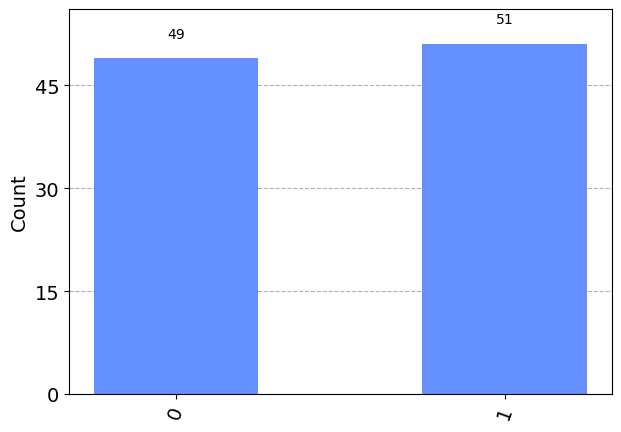

In [26]:
plot_histogram(count)

In [27]:
# run on real device
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.measure(0,0)
from qiskit import IBMQ
IBMQ.save_account('bab594bd69ecfd15937d2763062aafa0b2df980c3dfe09dd37d7785a740ea6e9f5625d48615a352e39b47058eab7681d1cd12572953e69e3335bc1fc32570a0a',overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
print(provider.backends())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\2856833871.py:6: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('bab594bd69ecfd15937d2763062aafa0b2df980c3dfe09dd37d7785a740ea6e9f5625d48615a352e39b47058eab7681d1cd12572953e69e3335bc1fc32570a0a',overwrite=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\2856833871.py:6: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qis

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [30]:
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq.job import job_monitor

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\2043102409.py:1: DeprecationWarning: qiskit.tools.monitor is deprecated and will be removed in Qiskit 1.0.0
  from qiskit.tools.monitor import job_monitor


In [31]:
# selecting a quan device
quant_comp = provider.get_backend('ibm_osaka')
job = execute(circuit,backend=quant_comp)
job_monitor(job)
result = job.result()
count = result.get_counts()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\1337843121.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit,backend=quant_comp)


Job Status: job is queued (None) [Est. wait time: ]

KeyboardInterrupt: 

C:\Users\LENOVO\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


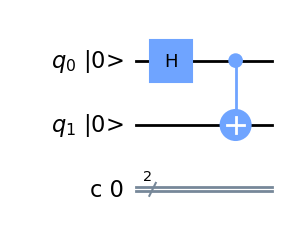

In [32]:
# Bell state 1
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.draw(output='mpl',initial_state=True)



In [33]:
st = Statevector.from_instruction(circuit)
array_to_latex(st)

<IPython.core.display.Latex object>

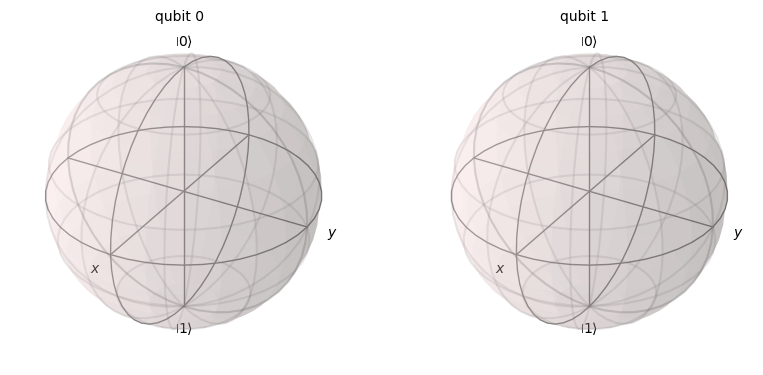

In [34]:
plot_bloch_multivector(st)